Segunda aula de Data Analytics

In [25]:
import pandas as pd
import numpy as np

tabela = pd.read_csv("data/pima_diabetes.csv")
tabela.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
media = tabela["Glucose"].mean()
print("Media: ", media)

mediana = tabela["Glucose"].median() 
print ("Mediana: ", mediana)

moda = tabela["Glucose"].mode()
print ("Moda: ", moda.values)

amplitude = tabela["Glucose"].max() - tabela["Glucose"].min()
print("Amplitude: ",amplitude)

variancia = tabela["Glucose"].var()
variancia_arredondada = round(variancia,2)
print("Variância Arredondada: ",variancia_arredondada)
print("Variância : ",variancia)

Media:  120.89453125
Mediana:  117.0
Moda:  [ 99 100]
Amplitude:  199
Variância Arredondada:  1022.25
Variância :  1022.2483142519557


Calculo de Percentis e quartis

In [27]:
percentis = tabela["Glucose"].quantile([0.10,0.25])
print("Percentis: ", percentis)

quartis=tabela["Glucose"].quantile([0.25,0.50,0.75])
print("Quartis: ",quartis)

Percentis:  0.10    85.0
0.25    99.0
Name: Glucose, dtype: float64
Quartis:  0.25     99.00
0.50    117.00
0.75    140.25
Name: Glucose, dtype: float64


Exibir dados gerais de analise univariada de um dataframe

In [28]:
tabela.describe()

tabela['Pregnancies'].describe()

tabela.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
605,1,124,60,32,0,35.8,0.514,21,0
300,0,167,0,0,0,32.3,0.839,30,1
543,4,84,90,23,56,39.5,0.159,25,0
520,2,68,70,32,66,25.0,0.187,25,0
220,0,177,60,29,478,34.6,1.072,21,1
337,5,115,76,0,0,31.2,0.343,44,1
66,0,109,88,30,0,32.5,0.855,38,1
491,2,89,90,30,0,33.5,0.292,42,0
705,6,80,80,36,0,39.8,0.177,28,0
720,4,83,86,19,0,29.3,0.317,34,0


Media:  Glucose    120.894531
dtype: float64


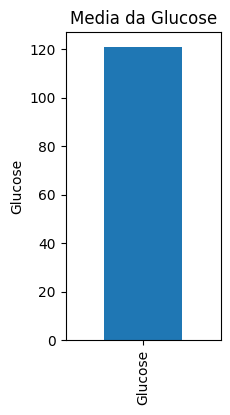

In [ ]:
import matplotlib.pyplot as plt

print("Media: ",tabela[["Glucose"]].mean())
tabela[["Glucose"]].mean().plot.bar(
    figsize = (2,4),
    title = "Media da Glucose"
)

plt.ylabel("Glucose");

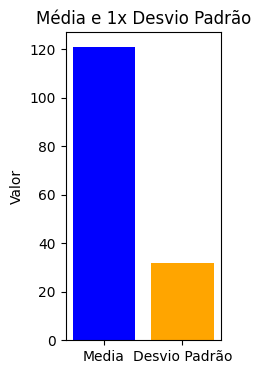

In [29]:

media = tabela["Glucose"].mean()
desvio = tabela["Glucose"].std()


plt.figure(figsize=(2,4))
plt.bar(["Media", "Desvio Padrão"], [media,desvio], color = ["blue", "orange"]
        )
plt.title("Média e 1x Desvio Padrão")

plt.ylabel("Valor")

plt.show()


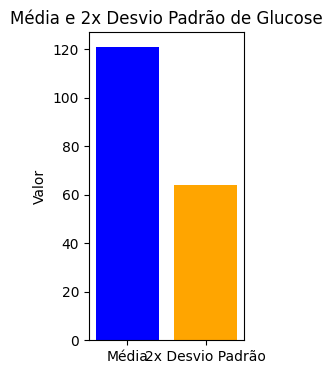

In [30]:

media = tabela["Glucose"].mean()
desvio = tabela["Glucose"].std()

plt.figure(figsize=(2,4))
plt.bar(["Média" , "2x Desvio Padrão"], [media,desvio*2], color = ["blue","orange"])
plt.title("Média e 2x Desvio Padrão de Glucose")
plt.ylabel("Valor")
plt.show()

Desvio padrão

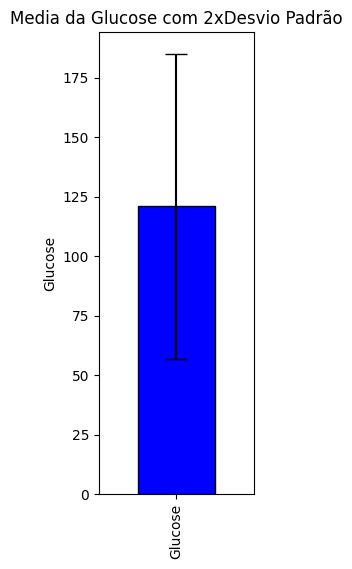

In [31]:
tabela[["Glucose"]].mean().plot.bar(
    yerr = tabela[["Glucose"]].std()*2,
    capsize=8,
    figsize = (2,6),
    color = "blue",
    edgecolor = "black",
    title = "Media da Glucose com 2xDesvio Padrão"
)

plt.ylabel("Glucose");

Desvio padrão 2x

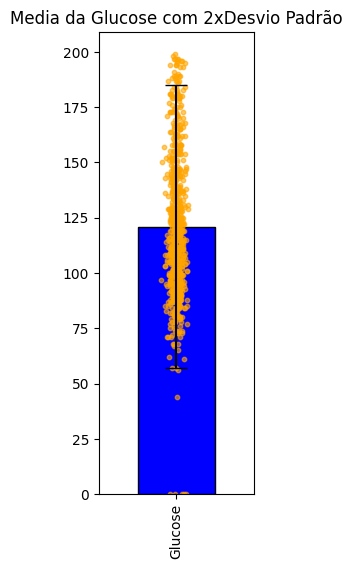

In [61]:
ax = tabela[["Glucose"]].mean().plot.bar( #voce declara uma variavel para poder utiliza dps
    yerr = tabela[["Glucose"]].std()*2,
    capsize=8,
    figsize = (2,6),
    color = "blue",
    edgecolor = "black",
    title = "Media da Glucose com 2xDesvio Padrão"
)

ax.scatter(0 + np.random.normal(0, 0.03, len(tabela)),
tabela["Glucose"],
s = 10,
color = "orange",
alpha = 0.6)


Desvio Padrão:  Glucose    31.972618
dtype: float64
N:  768
Erro padrao da media (SEM): Glucose    1.153712
dtype: float64


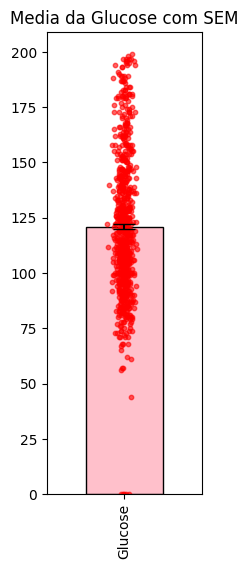

In [67]:
desvio_padrao = tabela[["Glucose"]].std()
n= len(tabela[["Glucose"]])
sem = desvio_padrao/np.sqrt(n)

print("Desvio Padrão: ",desvio_padrao)
print("N: ",n)
print("Erro padrao da media (SEM):", sem)

ax = tabela[["Glucose"]].mean().plot.bar( #voce declara uma variavel para poder utiliza dps
    yerr = sem,
    capsize=8,
    figsize = (2,6),
    color = "pink",
    edgecolor = "black",
    title = "Media da Glucose com SEM"
)

ax.scatter(0 + np.random.normal(0, 0.03, len(tabela)),
tabela["Glucose"],
s = 10,
color = "red",
alpha = 0.6)


Intervalo de confiança 95%

Desvio Padrão:  Glucose    31.972618
dtype: float64
N:  768
Erro padrao da media (SEM): Glucose    1.153712
dtype: float64
Intervalo de confiança 95%(IC95): Glucose    2.261276
dtype: float64


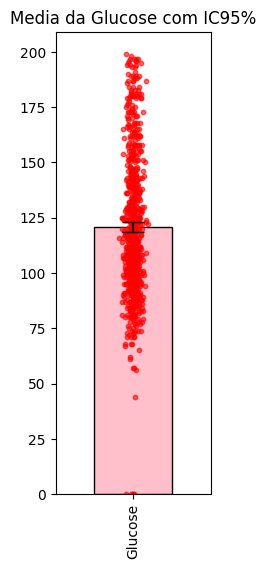

In [70]:
desvio_padrao = tabela[["Glucose"]].std()
n= len(tabela[["Glucose"]])
sem = desvio_padrao/np.sqrt(n)
ic95 = 1.96*sem

print("Desvio Padrão: ",desvio_padrao)
print("N: ",n)
print("Erro padrao da media (SEM):", sem)
print("Intervalo de confiança 95%(IC95):", ic95)

ax = tabela[["Glucose"]].mean().plot.bar( #voce declara uma variavel para poder utiliza dps
    yerr = ic95,
    capsize=8,
    figsize = (2,6),
    color = "pink",
    edgecolor = "black",
    title = "Media da Glucose com IC95%"
)

ax.scatter(0 + np.random.normal(0, 0.03, len(tabela)),
tabela["Glucose"],
s = 10,
color = "red",
alpha = 0.6)


Media, desvio padrao, sem, ic95%
Insulin

Desvio Padrão:  Insulin    115.244002
dtype: float64
N:  768
Media:  79.79947916666667
Erro padrao da media (SEM): Insulin    4.15851
dtype: float64
Intervalo de confiança 95%(IC95): Insulin    8.150679
dtype: float64


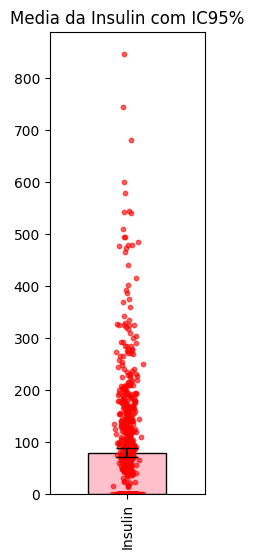

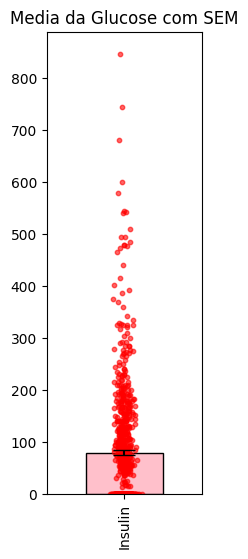

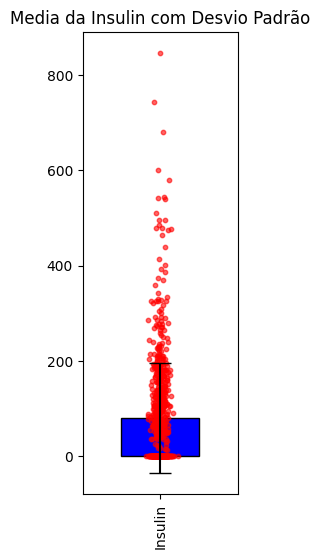

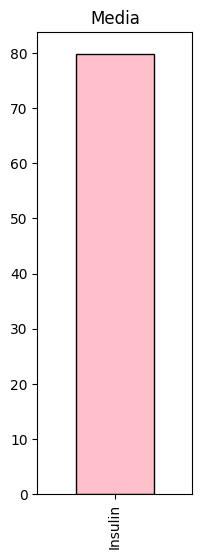

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Lembre-se de importar

# --- Seus Cálculos (Estão corretos) ---
desvio_padrao = tabela[["Insulin"]].std()
media = tabela["Insulin"].mean()
n = len(tabela[["Insulin"]])
sem = desvio_padrao / np.sqrt(n)
ic95 = 1.96 * sem

print("Desvio Padrão: ", desvio_padrao)
print("N: ", n)
print("Media: ", media)
print("Erro padrao da media (SEM):", sem)
print("Intervalo de confiança 95%(IC95):", ic95)

# --- GRÁFICO 1 (IC95) ---

# 1. Crie a Figura 1 e o Eixo 1
fig1, ax = plt.subplots(figsize=(2, 6))

# 2. Mande o pandas desenhar no 'ax'
tabela[["Insulin"]].mean().plot.bar(
    yerr=ic95,
    capsize=8,
    color="pink",
    edgecolor="black",
    title="Media da Insulin com IC95%",
    ax=ax 
)

ax.scatter(0 + np.random.normal(0, 0.03, len(tabela)),
           tabela["Insulin"],
           s=10,
           color="red",
           alpha=0.6)



fig4, ax4 =  plt.subplots(figsize=(2, 6)) 

ax4 = tabela[["Insulin"]].mean().plot.bar( #voce declara uma variavel para poder utiliza dps
    yerr = sem,
    capsize=8,
    figsize = (2,6),
    color = "pink",
    edgecolor = "black",
    title = "Media da Glucose com SEM"
)

ax4.scatter(0 + np.random.normal(0, 0.03, len(tabela)),
tabela["Insulin"],
s = 10,
color = "red",
alpha = 0.6)



fig2, ax2 = plt.subplots(figsize=(2, 6))


tabela[["Insulin"]].mean().plot.bar(
    yerr=tabela[["Insulin"]].std(), 
    capsize=8,
    color="blue",
    edgecolor="black",
    title="Media da Insulin com Desvio Padrão", 
    ax=ax2 
)

# 3. Use o 'ax2' para fazer o scatter
ax2.scatter(0 + np.random.normal(0, 0.03, len(tabela)),
            tabela["Insulin"],
            s=10,
            color="red",
            alpha=0.6)

fig3, ax3 = plt.subplots(figsize=(2, 6))
ax3 = tabela[["Insulin"]].mean().plot.bar( #voce declara uma variavel para poder utiliza dps
    capsize=8,
    figsize = (2,6),
    color = "pink",
    edgecolor = "black",
    title = "Media"
)



plt.show()